# Assignment-04-Simple Linear Regression-Question 1

# Simple linear regression

question no 1

finding delivery time using sorting time.

lets assume our target accuracy that is our r_square value as 75%

In [59]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [60]:
deli=pd.read_csv('delivery_time.csv')
deli

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [61]:
deli.shape

(21, 2)

In [62]:
deli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [63]:
deli.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [64]:
deli.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

In [65]:
deli=deli.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
deli

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


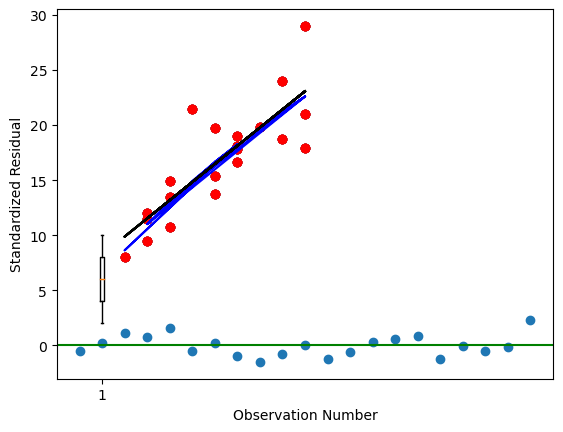

In [66]:
plt.boxplot(deli.sorting_time)
plt.show()

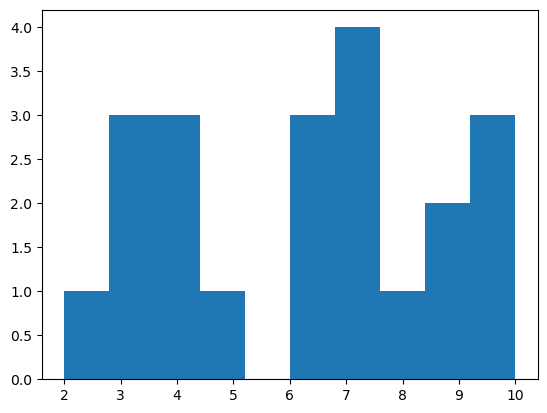

In [67]:
plt.hist(deli.sorting_time)
plt.show()

In [68]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [69]:
sns.distplot(deli['sorting_time'])

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

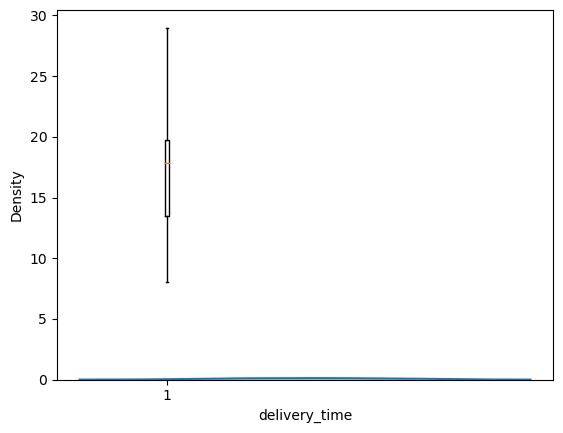

In [70]:
plt.boxplot(deli.delivery_time)
plt.xlabel('delivery_time')
plt.show()

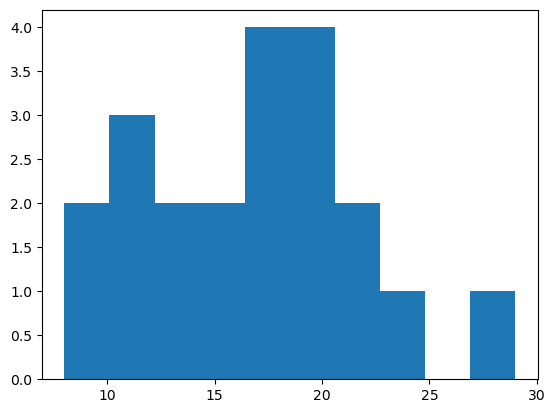

In [71]:
plt.hist(deli.delivery_time)
plt.show()

In [72]:
sns.distplot(deli['delivery_time'])

<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

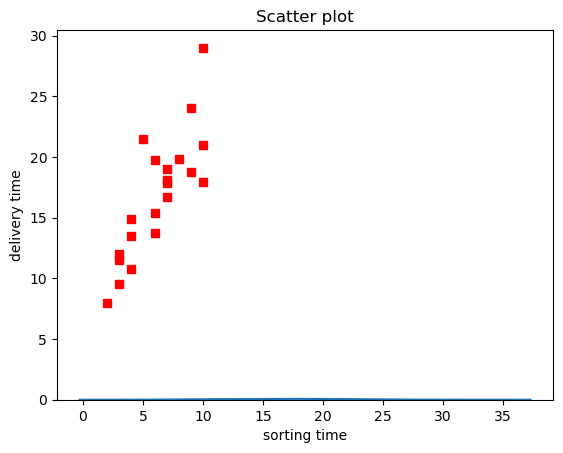

In [73]:
plt.plot(deli.sorting_time,deli.delivery_time,'rs')
plt.xlabel('sorting time')
plt.ylabel('delivery time')
plt.title('Scatter plot')
plt.show()

# corelation testing


In [74]:
deli.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


delivery time and sorting time are strongly co related.

# model building and testing 


In [75]:
import statsmodels.formula.api as smf
model=smf.ols('delivery_time~sorting_time',data=deli).fit()
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Thu, 02 Feb 2023   Prob (F-statistic):           3.98e-06
Time:                        11:40:54   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

our R-sqare value is 0.68

p value is 0.000 so that our sorting time is significant 

beta(0) is 6.58 and beta(1) is 1.649

In [77]:
model.resid

0    -2.072933
1     0.321186
2     3.273147
3     2.576087
4     5.927067
5    -1.126853
6     0.874127
7    -2.029794
8    -5.172933
9    -2.673913
10    0.055107
11   -2.428814
12   -1.445873
13   -0.029794
14    0.500206
15    1.701186
16   -2.726853
17   -0.015873
18   -1.880774
19   -0.295873
20    6.672167
dtype: float64

In [78]:
pred=model.predict(deli.sorting_time)
pred

0     23.072933
1     13.178814
2     16.476853
3     21.423913
4     23.072933
5     16.476853
6     18.125873
7     11.529794
8     23.072933
9     21.423913
10    19.774893
11    13.178814
12    18.125873
13    11.529794
14    11.529794
15    13.178814
16    16.476853
17    18.125873
18     9.880774
19    18.125873
20    14.827833
dtype: float64

In [79]:
#root mean square value of errors
rmse_lin = np.sqrt(np.mean((np.array(deli['delivery_time'])-np.array(pred))**2))
rmse_lin

2.7916503270617654

In [80]:
plt.scatter(x=deli['sorting_time'],y=deli['delivery_time'],color='red')
plt.plot(deli['sorting_time'],pred,color='black')
plt.xlabel('sorting time')
plt.ylabel('delivery time')

Text(0, 0.5, 'delivery time')

to achieve assumed accuracy , i am going to build another model using combination of logarithmic and logarithmic functions


# model 2


In [81]:
import statsmodels.formula.api as smf
model2 = smf.ols("np.log(delivery_time)~np.log(sorting_time)",data=deli).fit()

In [82]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Thu, 02 Feb 2023   Prob (F-statistic):           1.60e-07
Time:                           11:40:54   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As our R square value is 0.772 that is 77.2% we achieved our assumed accuracy

the p value for sorting time is less than 0.05 it is significant.

beta(0)=1.742 beta(1)=0.5975 beta

In [83]:
model2.resid

0    -0.073311
1     0.032361
2     0.170550
3     0.123176
4     0.249463
5    -0.081488
6     0.039727
7    -0.147141
8    -0.233032
9    -0.123684
10    0.002696
11   -0.195423
12   -0.090501
13    0.043915
14    0.088971
15    0.129689
16   -0.191565
17   -0.008248
18   -0.076716
19   -0.023829
20    0.364391
dtype: float64

In [84]:
model2.resid_pearson

array([-0.47042351,  0.20765416,  1.09439452,  0.79040191,  1.600765  ,
       -0.52289568,  0.25492302, -0.94417959, -1.49533389, -0.79366223,
        0.01730048, -1.2540012 , -0.58073428,  0.28179324,  0.57091402,
        0.83219556, -1.22924105, -0.05292349, -0.49227806, -0.15290982,
        2.3382409 ])

In [85]:
pred2 = model2.predict(pd.DataFrame(deli['sorting_time'])) 
pred2=np.exp(pred2)
pred2

0     22.597360
1     13.070123
2     16.653216
3     21.218593
4     22.597360
5     16.653216
6     18.259981
7     11.005911
8     22.597360
9     21.218593
10    19.776608
11    13.070123
12    18.259981
13    11.005911
14    11.005911
15    13.070123
16    16.653216
17    18.259981
18     8.637887
19    18.259981
20    14.934324
dtype: float64

In [86]:
pred2
rmse_log = np.sqrt(np.mean((np.array(deli['delivery_time'])-np.array(pred2))**2))
rmse_log 

2.7458288976145497

In [87]:
pred2.corr(deli.delivery_time)

0.833146471643729

In [88]:
plt.scatter(x=deli['sorting_time'],y=deli['delivery_time'],color='green')
plt.plot(deli['sorting_time'],pred2,color='blue')
plt.xlabel('sorting time')
plt.ylabel('delivery time') 

Text(0, 0.5, 'delivery time')

# Model Validation

In [89]:
plt.plot(model2.resid_pearson,'o')
plt.axhline(y=0,color='green')
plt.xlabel("Observation Number")
plt.ylabel("Standardized Residual") 

Text(0, 0.5, 'Standardized Residual')

The std residuals have mean value 0 and its constant variance from mean so i can say that the model2 is valid one.

In [90]:
data = {"MODEL":pd.Series(["rmse_lin","rmse_log"]),
        "RMSE_Values":pd.Series([rmse_lin,rmse_log]),
        "Rsquare":pd.Series([model.rsquared,model2.rsquared])}
table=pd.DataFrame(data)
table 

,MODEL,RMSE_Values,Rsquare
0,rmse_lin,2.791650,0.682271
1,rmse_log,2.745829,0.772161


# Predicting delivery time using sorting time by using new Model

In [91]:
# taking sorting time 15 and 20 just to predict for these values
new_data=pd.Series([15,20])
data_pred=pd.DataFrame(new_data,columns=["sorting_time"])
model2.predict(np.exp(data_pred))

0    10.704822
1    13.692434
dtype: float64

In [92]:
np.exp([3.360108,3.532004])

array([28.79230028, 34.19242061])

The delivery time for 15 and 20 is 28.79 and 34.19 respectively